## Loading Libraries 😀

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset ☣

In [ ]:
dataset = pd.read_csv("AB_NYC_2019.csv")

## Loading the database ⚾

In [ ]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
dataset.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
categorical = [i for i in dataset.columns if dataset[i].dtype=='object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
dataset[categorical].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [ ]:
dataset[categorical].isnull().sum()

name                      16
host_name                 21
neighbourhood_group        0
neighbourhood              0
room_type                  0
last_review            10052
dtype: int64

In [ ]:
dataset = dataset.dropna()
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# check for symbols which now supposed to be there
for i in dataset[categorical]:
  print(dataset[i].value_counts()/np.float(len(dataset)))

Home away from home                                 0.000309
Loft Suite @ The Box House Hotel                    0.000283
Private Room                                        0.000258
Brooklyn Apartment                                  0.000232
New york Multi-unit building                        0.000206
                                                      ...   
Private Room with a Majestic View                   0.000026
Sunny Clean Bedroom                                 0.000026
Parlor Room In Victorian Townhouse                  0.000026
Spacious Attic Room                                 0.000026
Huge 1-bedroom available from April through July    0.000026
Name: name, Length: 38253, dtype: float64
Michael         0.008629
David           0.007960
John            0.006440
Alex            0.005899
Sonder (NYC)    0.005332
                  ...   
Samkit          0.000026
Rosi            0.000026
Elwanda         0.000026
Ehi             0.000026
Steve Kings     0.000026
Name: host_n

## Start to prepare


In [ ]:
# Convert "last_review" to datatype, because now is object
dataset['last_review'] = pd.to_datetime(dataset['last_review'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Extract Year, month, data form 'last_review"
dataset['Year'] = dataset['last_review'].dt.year
dataset['Month'] = dataset['last_review'].dt.month_name()
dataset['Day'] = dataset['last_review'].dt.day_name()
dataset.drop(columns=['last_review'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  reviews_per_month               

In [ ]:
dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,October,Friday
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,May,Tuesday
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,July,Friday
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,November,Monday
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,2019,June,Saturday
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,2017,October,Thursday
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,2019,June,Monday
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,2017,July,Friday
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,2019,June,Sunday
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6,2019,June,Saturday


## Analisys

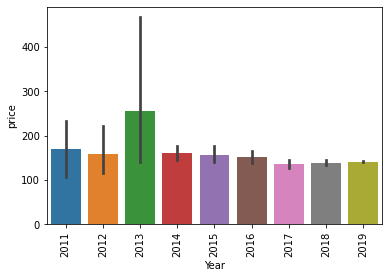

In [ ]:
# Analysis per year 
sns.barplot(x = dataset['Year'], y = dataset['price'])
plt.xticks(rotation = 'vertical')
plt.show()

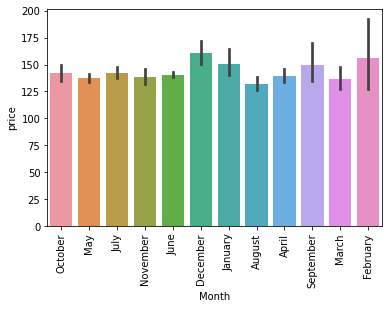

In [ ]:
#Analysis per month
sns.barplot(x = dataset['Month'], y = dataset['price'])
plt.xticks(rotation = 'vertical')
plt.show()

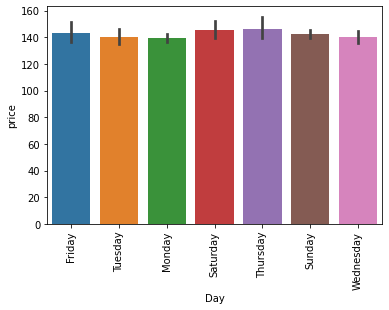

In [ ]:
#Analysis per day
sns.barplot(x = dataset['Day'], y = dataset['price'])
plt.xticks(rotation = 'vertical')
plt.show()

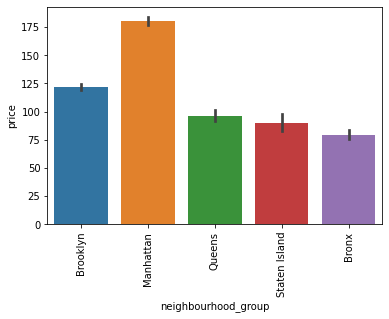

In [ ]:
#Analysis per neighbourhood
sns.barplot(x = dataset['neighbourhood_group'], y = dataset['price'])
plt.xticks(rotation = 'vertical')
plt.show()

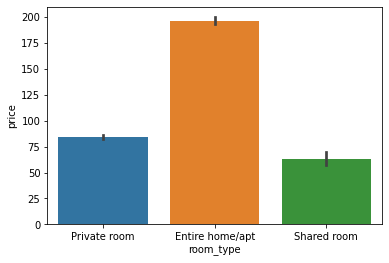

In [ ]:
#Analysis room type
sns.barplot(x = dataset['room_type'], y = dataset['price'])
#plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# Analysing Price - avarige 
mean = round(dataset['price'].mean(), 2)
print("Avarage price $",mean)

Avarage price $ 142.33


In [ ]:
#Number of nights
minNights = round(dataset['minimum_nights'].mean())
print(minNights)

6


In [ ]:
# staing for a month or more
min_n_30 = dataset[dataset['minimum_nights'] >= 30]
min_n_30['neighbourhood_group'].value_counts()

Manhattan        1626
Brooklyn          864
Queens            213
Bronx              24
Staten Island      12
Name: neighbourhood_group, dtype: int64

In [ ]:
#staing for a year or more
min_n_365 = dataset[dataset['minimum_nights'] >= 365]
min_n_365['neighbourhood_group'].value_counts()

Manhattan    14
Brooklyn     10
Queens        1
Name: neighbourhood_group, dtype: int64

#### Dataset
[New York AirBnbs](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/code)

## Question
 - What are the trends in different Airbnb listings?

### Conclusion

The year with high demand for AirBnbs is 2013. The average price to rent an AirBnb is 142.33 US dollars.

The most popular option is an entire apartment, followed by a private room as a second option and shared room as third to be rented. A lot of people choose to stay in Manhattan or Brooklyn. 

Based on the days of the week there is not specific preference. However, for the months December and February the demand of AirBNB in New York increase 
( reason for this is the arrival of the new year for December and Valentine's day in February).

Suggestion:
 - discouts for regular customers 
 - offering a sightseeing tours
